# Finding "Gaps" in an imperfect 2D Lattice

In [840]:
import numpy as np

example1 = np.array([[1., 0., 0., 0., 1., 0., 0., 0., 0.],  #One gap here
                     [0., 0., 1., 0., 0., 0., 1., 0., 0.],
                     [1., 0., 0., 0., 1., 0., 0., 0., 1.],
                     [0., 0., 1., 0., 0., 0., 0., 0., 0.],  #One gap here
                     [1., 0., 0., 0., 1., 0., 0., 0., 1.]])

example2 = np.array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                     [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],  #One gap here
                     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                     [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                     [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],  #One gap here
                     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                     [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                     [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
                     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                     [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]) #Two gaps here

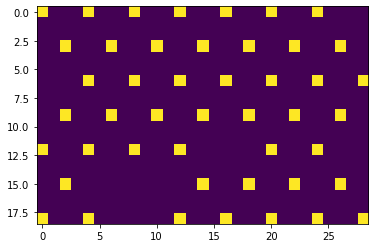

In [568]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_random_lattice(gaps=0.1):
    
    #Generate random tile pattern
    n,m = random.randrange(3,9,2), random.randrange(3,9,2)
    tile = np.zeros((n,m)).astype(int)
    tile[::tile.shape[0]-1, ::tile.shape[1]-1] = 1  #update corners
    tile[tile.shape[0]//2, tile.shape[1]//2] = 1    #update center
    tile = tile[:-1, :-1]                           #remove bottom edge
    
    #Create pure lattice
    x,y = np.random.randint(4,10), np.random.randint(4,10)
    lattice = np.tile(tile, (x,y))
    
    #Add impurities / gaps
    ones_shape = lattice[lattice.nonzero()].shape
    lattice[lattice.nonzero()] = np.random.binomial(n=1, p=1-gaps, size=ones_shape)
    
    #Fix edges
    lattice = lattice[:-n+2,:-m+2]
    
    #Plot lattice
    plt.imshow(lattice)
    return lattice

arr = generate_random_lattice()

In [729]:
import numpy as np
import matplotlib.pyplot as plt

def find_gaps(x, verbose=False):
    #Identifying the size and shape of the repeating pattern
    xdims = np.unique((x.sum(1)!=0).cumsum(), return_counts=True)[1].max()*2+1
    ydims = np.unique((x.sum(0)!=0).cumsum(), return_counts=True)[1].max()*2+1
    pattern_shape = (xdims, ydims)

    #Calculating number of rolling windows that exist with that pattern
    num_xpatterns = int(x.shape[0]/(pattern_shape[0]-1))
    num_ypatterns = int(x.shape[1]/(pattern_shape[1]-1))
    
    #Calculating the stride and shape that needs to be taken with stride_tricks
    shp = (num_xpatterns, num_ypatterns, xdims, ydims)
    strd = (x.strides[0]*(xdims-1), x.strides[1]*(ydims-1), x.strides[0], x.strides[1])

    #Generating rolling windows/convolutions over the image to separate the patterns.
    convolve_pattern = np.lib.stride_tricks.as_strided(x, shape=shp, strides=strd)

    #Assuming at least 1 untouched pattern exists, finding that pure pattern
    pattern_sums = convolve_pattern.sum(axis=(-1,-2))
    idx = np.unravel_index(np.argmax(pattern_sums), pattern_sums.shape)
    truth_pattern = convolve_pattern[idx]

    #Printing Debugging info
    if verbose==True:
        print('x shape:',x.shape)
        print('pattern shape:',pattern_shape)

        print('convolved shape:',convolve_pattern.shape)

        print('')
        print('pattern sums')
        print(pattern_sums)

        print('')
        print('true pattern')
        print(truth_pattern)
    
    #Identifying the gaps by subtracting the convolved image with the truth pattern
    gaps = convolve_pattern - truth_pattern[None, None, :, :]

    #Setting the gaps as -1 directly into the location of memory of the original image
    for i in np.argwhere(gaps==-1):
        convolve_pattern[tuple(i)]=-1
    
    plt.imshow(x)
    return x

arr = generate_random_lattice()   #Generate lattice
o = find_gaps(x, verbose=False)   #Find gaps in lattice

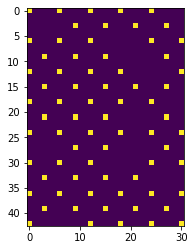

In [730]:
x = generate_random_lattice()

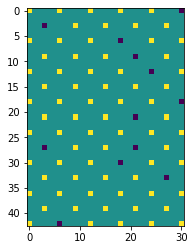

In [731]:
o = find_gaps(x)

# Step by Step

(17, 33)

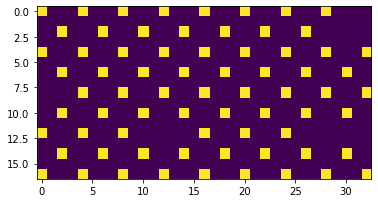

In [828]:
arr = generate_random_lattice()
arr.shape

In [829]:
arr.shape

(17, 33)

In [830]:
print(arr.sum(1))
print(arr.sum(0))

[8 0 7 0 9 0 8 0 8 0 8 0 6 0 8 0 9]
[4 0 4 0 5 0 4 0 5 0 4 0 4 0 4 0 5 0 4 0 5 0 4 0 5 0 4 0 4 0 3 0 3]


In [831]:
xdims = np.unique((arr.sum(1)!=0).cumsum(), return_counts=True)[1].max()*2+1
ydims = np.unique((arr.sum(0)!=0).cumsum(), return_counts=True)[1].max()*2+1

pattern_shape = (xdims, ydims)
pattern_shape

(5, 5)

In [832]:
num_xpatterns = int(arr.shape[0]/(pattern_shape[0]-1))
num_ypatterns = int(arr.shape[1]/(pattern_shape[1]-1))

print((num_xpatterns, num_ypatterns))

(4, 8)


In [833]:
#Calculating the stride and shape that needs to be taken with stride_tricks
shp = (num_xpatterns, num_ypatterns, xdims, ydims)
strd = (arr.strides[0]*(xdims-1), arr.strides[1]*(ydims-1), arr.strides[0], arr.strides[1])

#Generating rolling windows/convolutions over the image to separate the patterns.
convolve_pattern = np.lib.stride_tricks.as_strided(arr, shape=shp, strides=strd)
convolve_pattern.shape

(4, 8, 5, 5)

In [834]:
convolve_pattern[0,-1,:,:]

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1]])

In [835]:
pattern_sums = convolve_pattern.sum(axis=(-1,-2))
pattern_sums

array([[5, 5, 5, 5, 5, 5, 5, 3],
       [4, 5, 5, 5, 5, 5, 5, 5],
       [4, 5, 4, 4, 5, 5, 4, 3],
       [5, 5, 4, 4, 5, 5, 4, 3]])

In [836]:
pattern_sums = convolve_pattern.sum(axis=(-1,-2))
idx = np.unravel_index(np.argmax(pattern_sums), pattern_sums.shape)
truth_pattern = convolve_pattern[idx]

truth_pattern

array([[1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1]])

In [837]:
gaps = convolve_pattern - truth_pattern[None, None, :, :]
gaps[0,-1,:,:]

array([[ 0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [838]:
#Setting the gaps as -1 directly into the location of memory of the original image
for i in np.argwhere(gaps==-1):
    convolve_pattern[tuple(i)]=-1

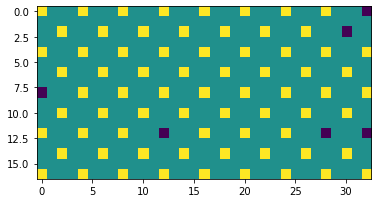

In [839]:
plt.imshow(arr)